### Importing required libraries

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [2]:
df = pd.read_csv('AirPassenger.csv',parse_dates=True,index_col = 'Year-Month')
df.head()

df.dtypes

Pax    int64
dtype: object

### Plotting time series

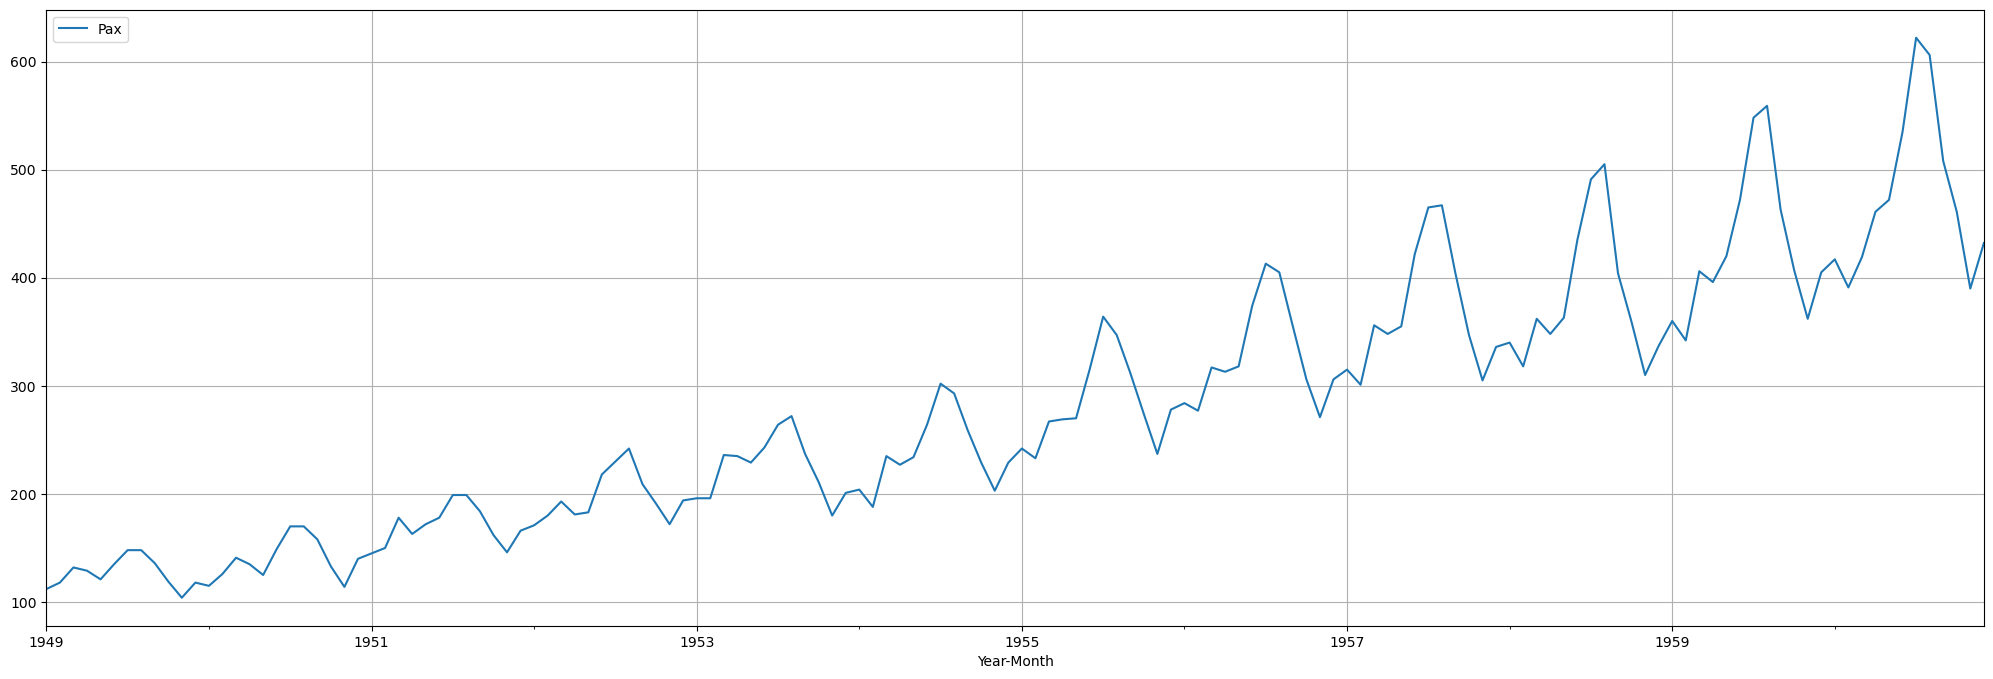

In [3]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [4]:
train_end=datetime(1958,12,31)
test_end=datetime(1960,12,31)

In [5]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [6]:
print('Train')
display(train)
print('Test')
display(test)

Train


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-08-01,505
1958-09-01,404
1958-10-01,359


Test


,Pax
Year-Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


# Double Exponential Smoothing / Holt's linear Method

In [7]:
model_DES = Holt(train,exponential=True, initialization_method='estimated')

#### training the double exponential model

In [8]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [9]:
model_DES_fit1.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,Holt,SSE,98479.555
Optimized:,True,AIC,813.214
Trend:,Multiplicative,BIC,824.363
Seasonal:,None,AICC,813.957
Seasonal Periods:,None,Date:,"Thu, 18 Apr 2024"
Box-Cox:,False,Time:,15:22:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950906,alpha,True
smoothing_trend,9.8197e-05,beta,True


#### Predicting forecast

In [11]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))
DES_predict1

1959-01-01    337.014013
1959-02-01    337.158810
1959-03-01    337.303669
1959-04-01    337.448590
1959-05-01    337.593574
1959-06-01    337.738620
1959-07-01    337.883728
1959-08-01    338.028899
1959-09-01    338.174132
1959-10-01    338.319427
1959-11-01    338.464785
1959-12-01    338.610206
1960-01-01    338.755688
1960-02-01    338.901234
1960-03-01    339.046841
1960-04-01    339.192512
1960-05-01    339.338245
1960-06-01    339.484040
1960-07-01    339.629898
1960-08-01    339.775819
1960-09-01    339.921803
1960-10-01    340.067849
1960-11-01    340.213958
1960-12-01    340.360130
Freq: MS, dtype: float64

#### Lets plot the forecast for SES and DES

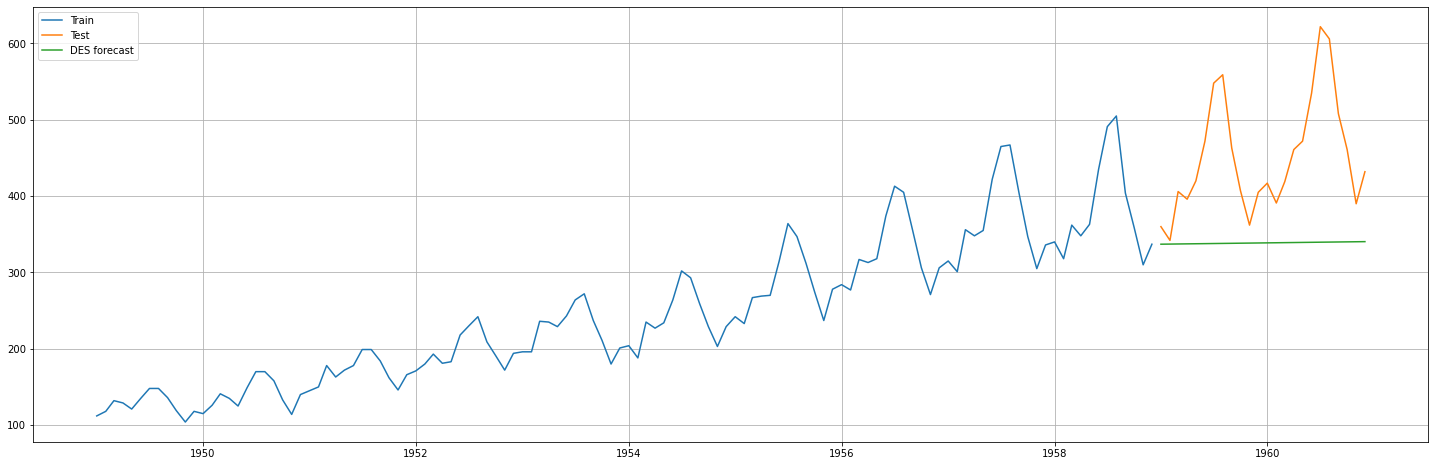

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

# Triple Exponential Smoothing / Holt-Winters Method

#### lets build model using 'additive' seasonality

In [ ]:
model_TES_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

#### training the model

In [ ]:
model_TES_add = model_TES_add.fit(optimized=True)

In [ ]:
model_TES_add.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,16033.589
Optimized:,True,AIC,619.394
Trend:,Additive,BIC,663.994
Seasonal:,Additive,AICC,626.166
Seasonal Periods:,12,Date:,"Wed, 10 Mar 2021"
Box-Cox:,False,Time:,18:10:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2367681,alpha,True
smoothing_trend,5.7672e-10,beta,True


#### predicting forecast

In [ ]:
TES_add_predict =  model_TES_add.forecast(len(test))

#### lets plot foecast results

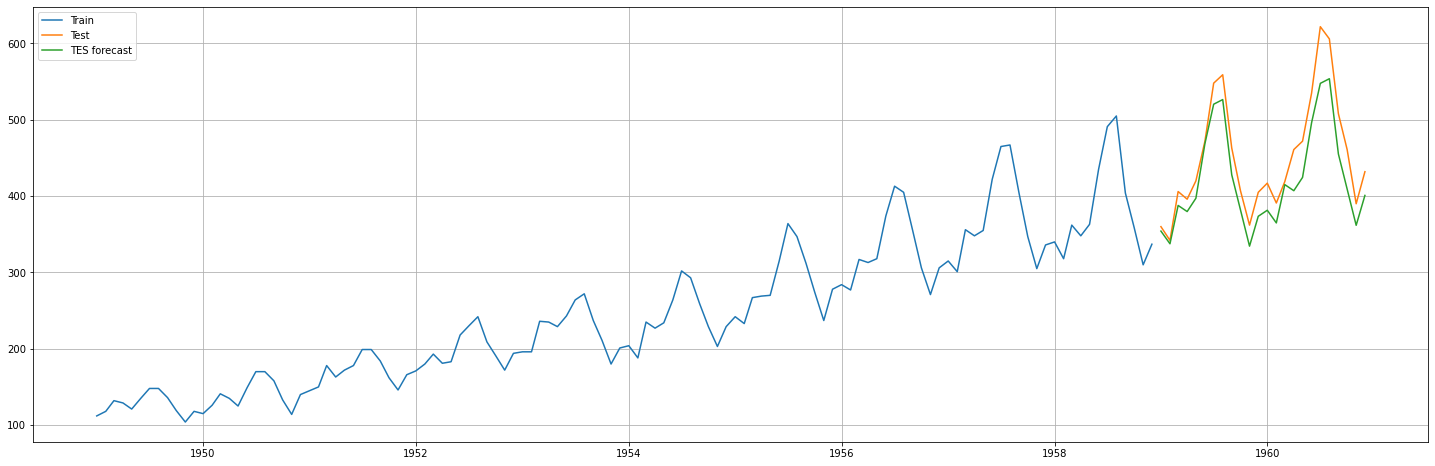

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_add_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

### Evaluating Model Performance

In [ ]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

35.75882010853071

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [ ]:
MAPE(test['Pax'],TES_add_predict)

6.636337766198731

#### lets build model uaing 'multiplicative' forecast

In [ ]:
model_TES_mul = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

#### training the model

In [ ]:
model_TES_mul = model_TES_mul.fit(optimized=True)

In [ ]:
model_TES_mul.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,10805.203
Optimized:,True,AIC,572.035
Trend:,Multiplicative,BIC,616.635
Seasonal:,Multiplicative,AICC,578.807
Seasonal Periods:,12,Date:,"Wed, 10 Mar 2021"
Box-Cox:,False,Time:,18:10:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3796558,alpha,True
smoothing_trend,4.4637e-10,beta,True


#### predicting forecast

In [ ]:
TES_mul_predict =  model_TES_mul.forecast(len(test))

#### lets plot foecast results for  H-W model with multiplicative seasonality

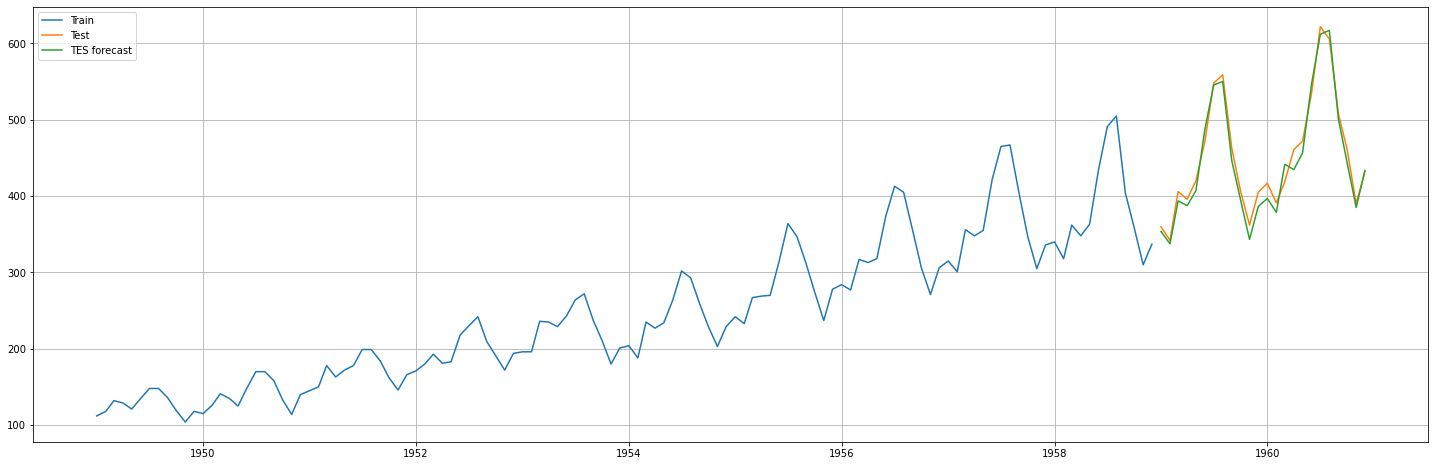

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_mul_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

## Evaluating Model Performance

In [ ]:
mean_squared_error(test.values,TES_mul_predict.values,squared=False)

13.87915336998583

#### Defining Mean Absolute Percentage error

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [ ]:
MAPE(test['Pax'],TES_mul_predict)

2.813305003034416

## forecasting

In [ ]:
model_TES_mul = ExponentialSmoothing(df,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')

In [ ]:
model_TES_mul = model_TES_mul.fit(optimized=True)

In [ ]:
model_TES_mul.summary()

Dep. Variable:,Pax,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15805.297
Optimized:,True,AIC,708.553
Trend:,Multiplicative,BIC,756.070
Seasonal:,Multiplicative,AICC,714.025
Seasonal Periods:,12,Date:,"Wed, 10 Mar 2021"
Box-Cox:,False,Time:,18:11:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2918983,alpha,True
smoothing_trend,1.3083e-11,beta,True


In [ ]:
TES_mul_predict =  model_TES_mul.forecast(12)

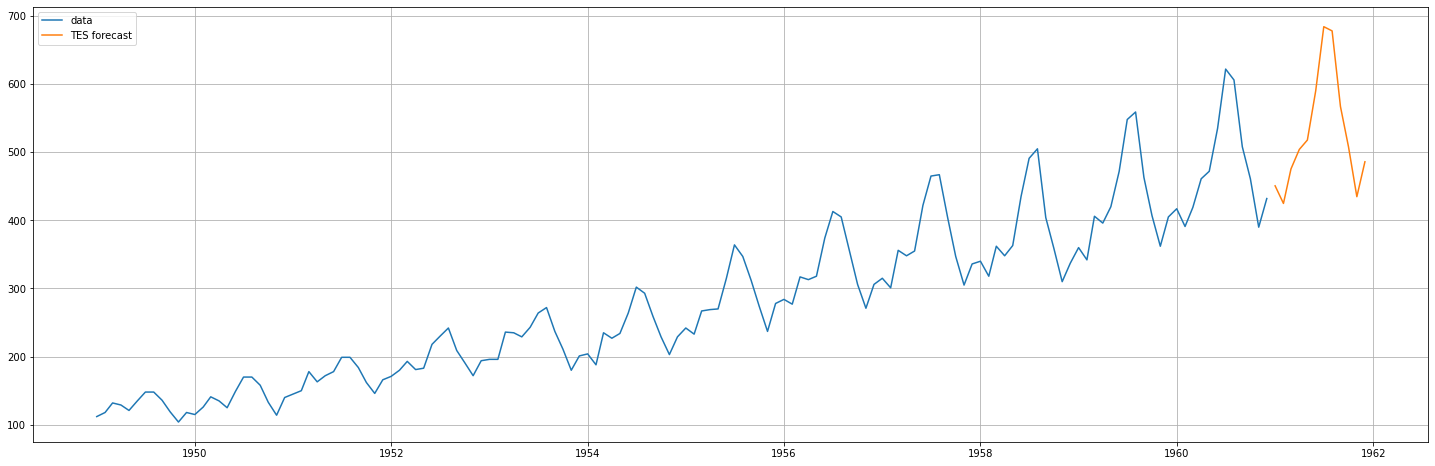

In [ ]:
plt.plot(df, label='data')
plt.plot(TES_mul_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

# END